In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('/content/insurance.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               

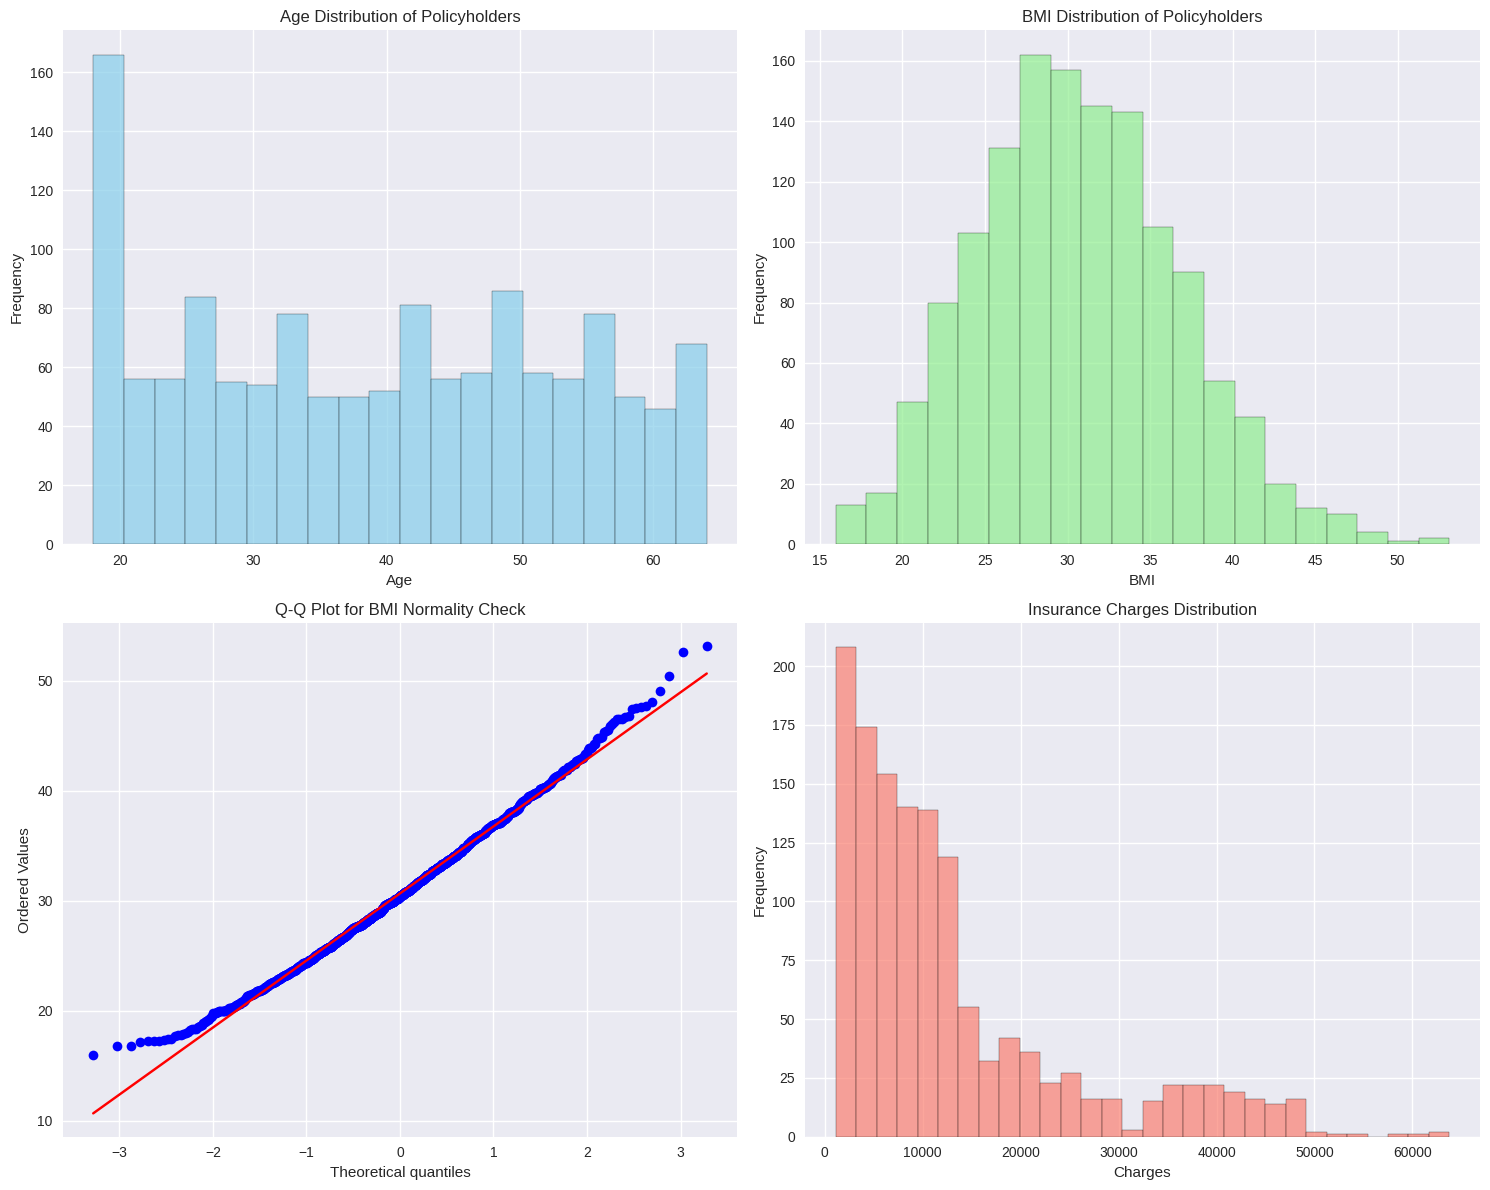

Skewness of insurance charges: 1.52
BMI normality test p-value: 0.0002


In [2]:
# Set up the visualization style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution of Policyholders')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# BMI distribution
axes[0, 1].hist(df['bmi'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('BMI Distribution of Policyholders')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Check if BMI is normally distributed using Q-Q plot
axes[1, 0] = plt.subplot(2, 2, 3)
stats.probplot(df['bmi'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot for BMI Normality Check')

# Insurance charges distribution
axes[1, 1].hist(df['charges'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Insurance Charges Distribution')
axes[1, 1].set_xlabel('Charges')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate skewness for charges
charges_skew = df['charges'].skew()
print(f"Skewness of insurance charges: {charges_skew:.2f}")

# Statistical test for BMI normality
bmi_stat, bmi_p = stats.normaltest(df['bmi'])
print(f"BMI normality test p-value: {bmi_p:.4f}")

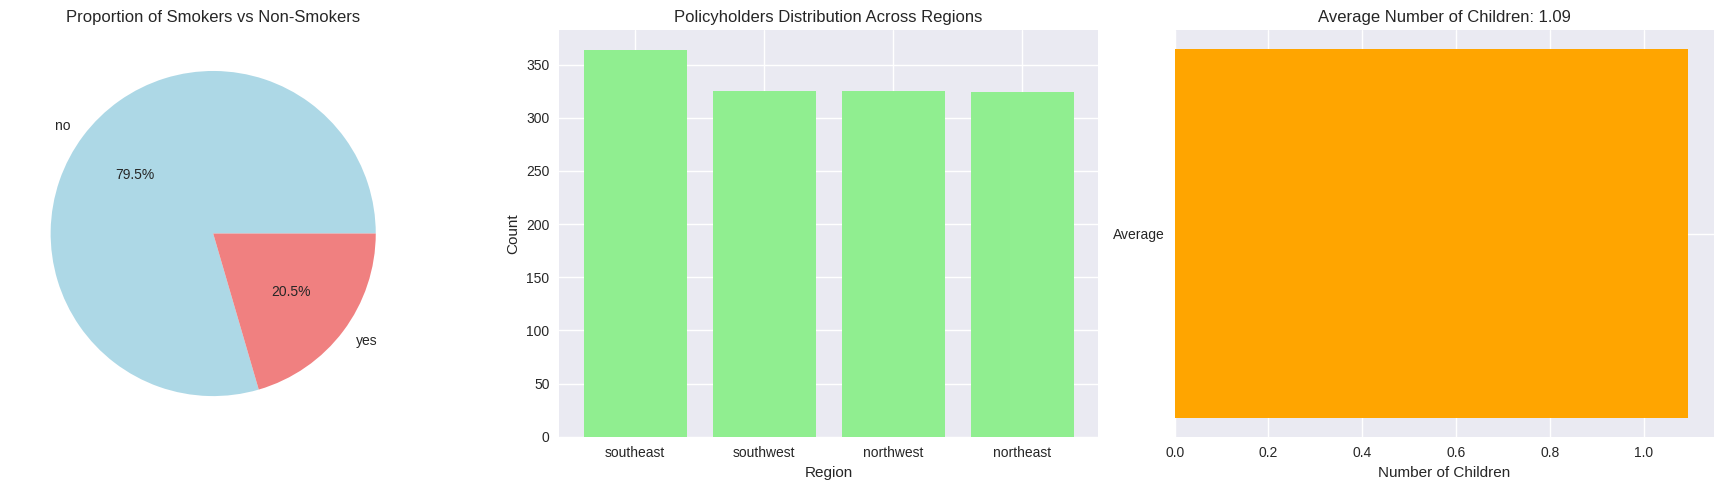

Proportion of smokers: 20.5%
Proportion of non-smokers: 79.5%

Region distribution:
southeast: 364 policyholders (27.2%)
southwest: 325 policyholders (24.3%)
northwest: 325 policyholders (24.3%)
northeast: 324 policyholders (24.2%)

Average number of children: 1.09


In [3]:
# Set up the visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Smoker proportion
smoker_counts = df['smoker'].value_counts()
axes[0].pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%',
            colors=['lightblue', 'lightcoral'])
axes[0].set_title('Proportion of Smokers vs Non-Smokers')

# Region distribution
region_counts = df['region'].value_counts()
axes[1].bar(region_counts.index, region_counts.values, color='lightgreen')
axes[1].set_title('Policyholders Distribution Across Regions')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')

# Average number of children
avg_children = df['children'].mean()
axes[2].barh(['Average'], [avg_children], color='orange')
axes[2].set_title(f'Average Number of Children: {avg_children:.2f}')
axes[2].set_xlabel('Number of Children')

plt.tight_layout()
plt.show()

# Additional calculations
print(f"Proportion of smokers: {smoker_counts['yes']/len(df)*100:.1f}%")
print(f"Proportion of non-smokers: {smoker_counts['no']/len(df)*100:.1f}%")
print("\nRegion distribution:")
for region, count in region_counts.items():
    print(f"{region}: {count} policyholders ({count/len(df)*100:.1f}%)")
print(f"\nAverage number of children: {avg_children:.2f}")

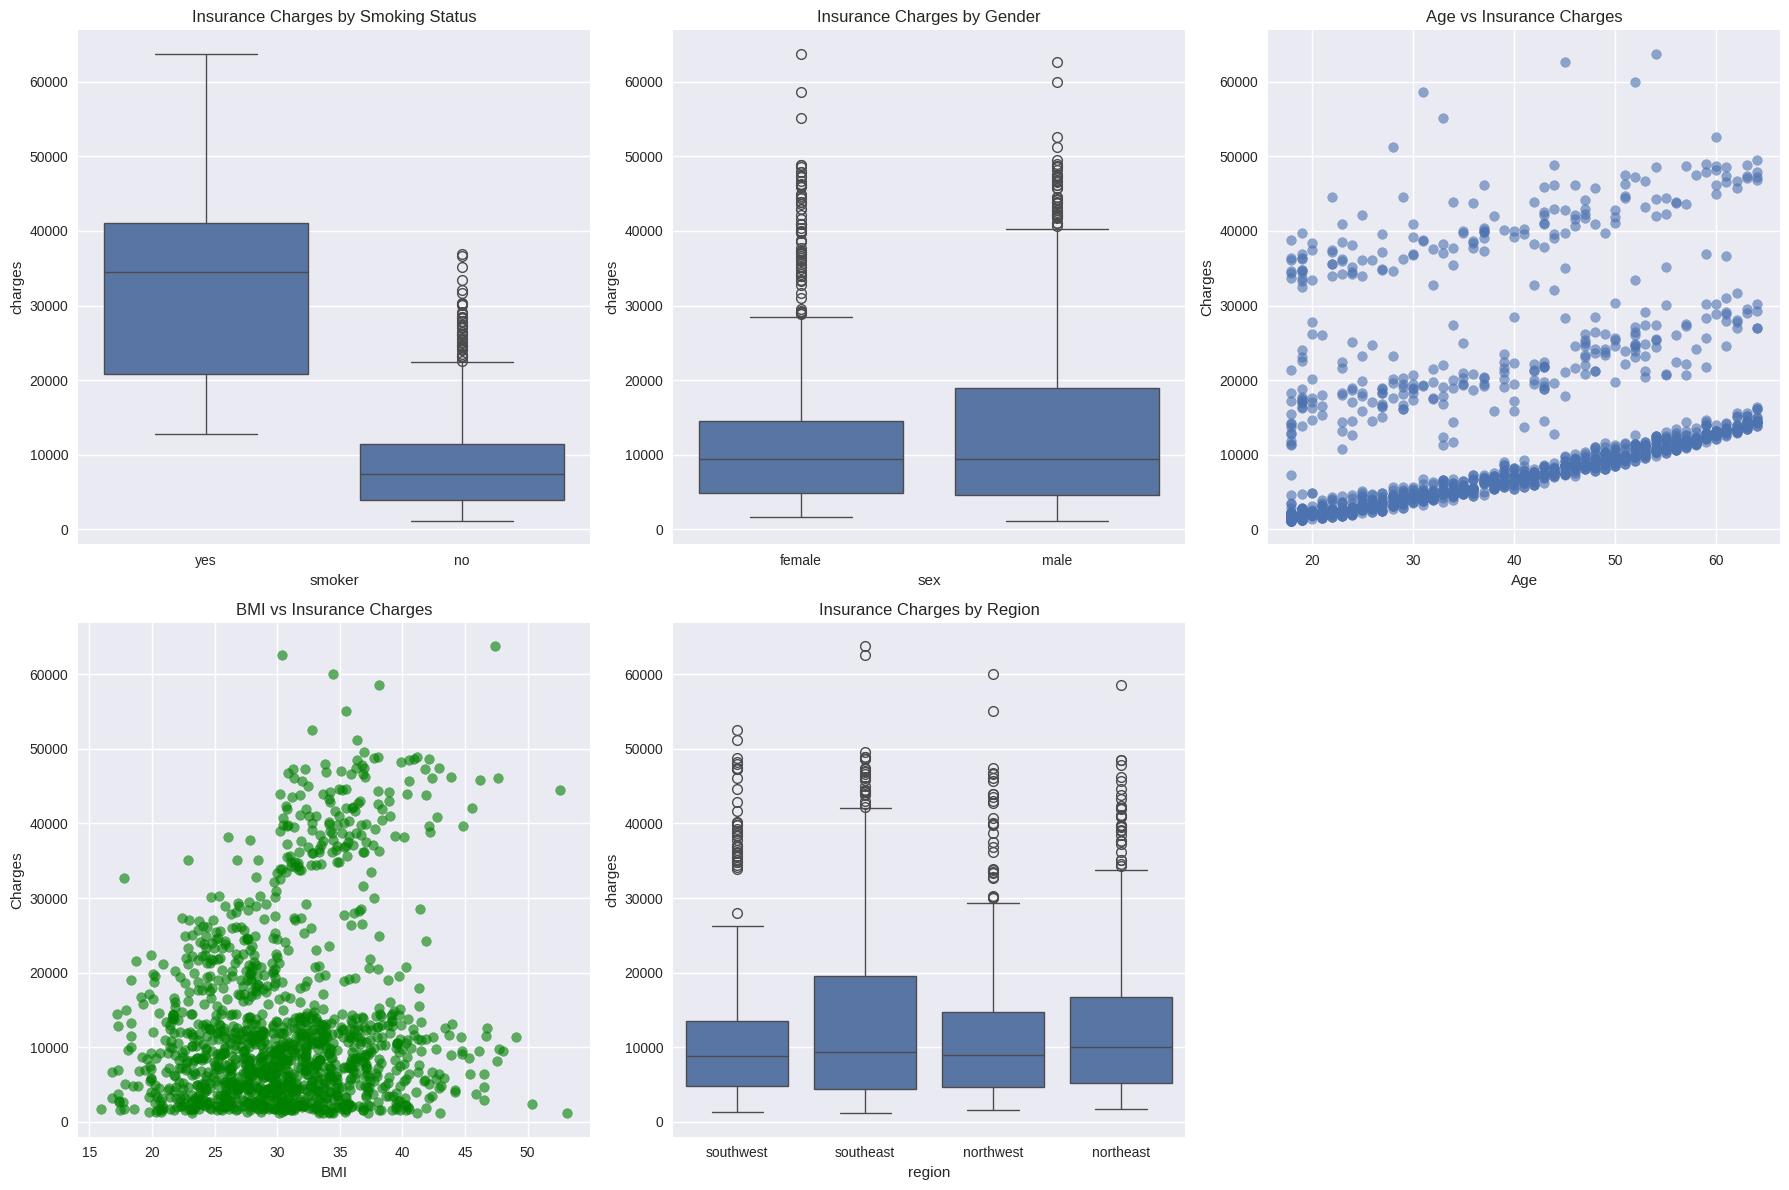

T-test for charges by smoking status: t-statistic = 32.75, p-value = 5.89e-103
T-test for charges by gender: t-statistic = 2.10, p-value = 0.0358
ANOVA for charges by region: F-statistic = 2.97, p-value = 0.0309
Correlation between age and charges: 0.299
Correlation between BMI and charges: 0.198


In [4]:
# Set up the visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Charges by smoking status
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Insurance Charges by Smoking Status')

# Charges by gender
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Insurance Charges by Gender')

# Age vs charges
axes[0, 2].scatter(df['age'], df['charges'], alpha=0.6)
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Charges')
axes[0, 2].set_title('Age vs Insurance Charges')

# BMI vs charges
axes[1, 0].scatter(df['bmi'], df['charges'], alpha=0.6, color='green')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Charges')
axes[1, 0].set_title('BMI vs Insurance Charges')

# Charges by region
sns.boxplot(x='region', y='charges', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Insurance Charges by Region')

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Statistical tests
# T-test for charges by smoking status
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
t_stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)
print(f"T-test for charges by smoking status: t-statistic = {t_stat:.2f}, p-value = {p_value:.2e}")

# T-test for charges by gender
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
t_stat_gender, p_value_gender = stats.ttest_ind(male_charges, female_charges, equal_var=False)
print(f"T-test for charges by gender: t-statistic = {t_stat_gender:.2f}, p-value = {p_value_gender:.4f}")

# ANOVA for charges by region
groups = [df[df['region'] == region]['charges'] for region in df['region'].unique()]
f_stat, p_value_region = stats.f_oneway(*groups)
print(f"ANOVA for charges by region: F-statistic = {f_stat:.2f}, p-value = {p_value_region:.4f}")

# Correlation analysis
correlation_age = df['age'].corr(df['charges'])
correlation_bmi = df['bmi'].corr(df['charges'])
print(f"Correlation between age and charges: {correlation_age:.3f}")
print(f"Correlation between BMI and charges: {correlation_bmi:.3f}")

In [5]:
# Prepare data for regression
df_reg = df.copy()

# Encode categorical variables
le = LabelEncoder()
df_reg['sex'] = le.fit_transform(df_reg['sex'])  # male=1, female=0
df_reg['smoker'] = le.fit_transform(df_reg['smoker'])  # yes=1, no=0

# One-hot encoding for region
df_reg = pd.get_dummies(df_reg, columns=['region'], prefix='region')

# Define features and target
X = df_reg.drop('charges', axis=1)
y = df_reg['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with random forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the random forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Results:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Test model performance without top features
# Without smoker
X_no_smoker = X.drop('smoker', axis=1)
X_train_no_smoker, X_test_no_smoker, y_train, y_test = train_test_split(X_no_smoker, y, test_size=0.2, random_state=42)
rf_model_no_smoker = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_smoker.fit(X_train_no_smoker, y_train)
y_pred_no_smoker = rf_model_no_smoker.predict(X_test_no_smoker)
r2_no_smoker = r2_score(y_test, y_pred_no_smoker)

# Without age
X_no_age = X.drop('age', axis=1)
X_train_no_age, X_test_no_age, y_train, y_test = train_test_split(X_no_age, y, test_size=0.2, random_state=42)
rf_model_no_age = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_age.fit(X_train_no_age, y_train)
y_pred_no_age = rf_model_no_age.predict(X_test_no_age)
r2_no_age = r2_score(y_test, y_pred_no_age)

print(f"\nR² without smoker feature: {r2_no_smoker:.4f}")
print(f"R² without age feature: {r2_no_age:.4f}")

Linear Regression Results:
RMSE: 5796.28
R² Score: 0.7836

Random Forest Regression Results:
RMSE: 4597.77
R² Score: 0.8638

Feature Importance (Random Forest):
            feature  importance
4            smoker    0.608618
2               bmi    0.213727
0               age    0.134119
3          children    0.019963
1               sex    0.006493
5  region_northeast    0.005515
6  region_northwest    0.004301
7  region_southeast    0.004203
8  region_southwest    0.003060

R² without smoker feature: 0.0420
R² without age feature: 0.7348


In [6]:
# Prepare data for classification
df_clf = df.copy()

# Encode categorical variables
df_clf['sex'] = le.fit_transform(df_clf['sex'])  # male=1, female=0
df_clf = pd.get_dummies(df_clf, columns=['region'], prefix='region')

# Define features and target
X_clf = df_clf.drop(['smoker', 'charges'], axis=1)  # Exclude charges as it's highly indicative of smoking
y_clf = df_clf['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Scale the features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Train a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_clf_scaled, y_train_clf)

# Make predictions
y_pred_clf = logreg.predict(X_test_clf_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Logistic Regression Accuracy for Smoking Prediction: {accuracy:.4f}")

# Train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Make predictions with random forest
y_pred_rf_clf = rf_clf.predict(X_test_clf)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test_clf, y_pred_rf_clf)
print(f"Random Forest Accuracy for Smoking Prediction: {accuracy_rf:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_rf_clf)
print("Confusion Matrix (Random Forest):")
print(cm)

# Feature importance for classification
feature_importance_clf = pd.DataFrame({
    'feature': X_clf.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance for Smoking Prediction (Random Forest):")
print(feature_importance_clf)

Logistic Regression Accuracy for Smoking Prediction: 0.7948
Random Forest Accuracy for Smoking Prediction: 0.7537
Confusion Matrix (Random Forest):
[[200  13]
 [ 53   2]]

Feature Importance for Smoking Prediction (Random Forest):
            feature  importance
2               bmi    0.452468
0               age    0.368618
3          children    0.094575
1               sex    0.031790
6  region_southeast    0.015228
5  region_northwest    0.012616
7  region_southwest    0.012601
4  region_northeast    0.012105


In [7]:
# Prepare data for region prediction
df_region = df.copy()

# Encode categorical variables
df_region['sex'] = le.fit_transform(df_region['sex'])  # male=1, female=0
df_region['smoker'] = le.fit_transform(df_region['smoker'])  # yes=1, no=0

# Define features and target
X_region = df_region.drop('region', axis=1)
y_region = df_region['region']

# Split the data
X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(
    X_region, y_region, test_size=0.2, random_state=42, stratify=y_region)

# Train a random forest classifier for region prediction
rf_region = RandomForestClassifier(n_estimators=100, random_state=42)
rf_region.fit(X_train_region, y_train_region)

# Make predictions
y_pred_region = rf_region.predict(X_test_region)

# Evaluate the model
accuracy_region = accuracy_score(y_test_region, y_pred_region)
print(f"Random Forest Accuracy for Region Prediction: {accuracy_region:.4f}")

# Feature importance for region prediction
feature_importance_region = pd.DataFrame({
    'feature': X_region.columns,
    'importance': rf_region.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance for Region Prediction (Random Forest):")
print(feature_importance_region)

Random Forest Accuracy for Region Prediction: 0.3433

Feature Importance for Region Prediction (Random Forest):
    feature  importance
2       bmi    0.318591
5   charges    0.308582
0       age    0.235599
3  children    0.090078
1       sex    0.033680
4    smoker    0.013470
